# Figure. TSS Distance

In [1]:
import cPickle
import glob
import os
import random
import subprocess

import cdpybio as cpb
from ipyparallel import Client
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pybedtools as pbt
from scipy.stats import fisher_exact
import seaborn as sns
import tabix
import vcf as pyvcf
import weblogolib as logo

import cardipspy as cpy
import ciepy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_tss_distance'

import socket
if socket.gethostname() == 'fl-hn1' or socket.gethostname() == 'fl-hn2':
    dy = os.path.join(ciepy.root, 'sandbox', dy_name)
    cpy.makedir(dy)
    pbt.set_tempdir(dy)
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
sns.set_style('whitegrid')

In [3]:
fn = os.path.join(ciepy.root, 'output', 'eqtl_processing', 'eqtls01', 'lead_variants.tsv')
lead_vars = pd.read_table(fn, index_col=0)
sig = lead_vars[lead_vars.perm_sig]

fn = os.path.join(ciepy.root, 'output', 'input_data', 'rnaseq_metadata.tsv')
rna_meta = pd.read_table(fn, index_col=0)

/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


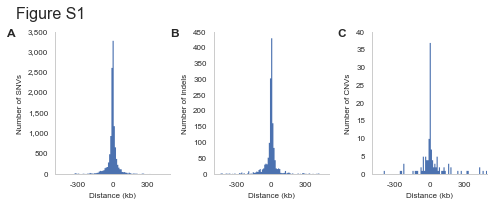

In [5]:
fig = plt.figure(figsize=(6.85, 3), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 1, 'Figure S1',
        size=16, va='top')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.8, 0.5, 1])

gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0, 0])
n,b,p = ax.hist(sig[sig.variant_type == 'snv'].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of SNVs', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])
    
ax = fig.add_subplot(gs[0, 1])
n,b,p = ax.hist(sig[(sig.variant_type == 'ins') | (sig.variant_type == 'del')].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of indels', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])
    
ax = fig.add_subplot(gs[0, 2])
n,b,p = ax.hist(sig[sig.variant_type == 'cnv'].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of CNVs', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])

t = fig.text(0.005, 0.81, 'A', weight='bold', 
             size=12)
t = fig.text(0.335, 0.81, 'B', weight='bold', 
             size=12)
t = fig.text(0.675, 0.81, 'C', weight='bold', 
             size=12)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.9])

fig.savefig(os.path.join(outdir, 'tss_distance.pdf'))
fig.savefig(os.path.join(outdir, 'tss_distance.png'), dpi=300)

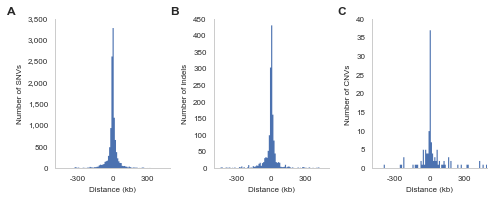

In [6]:
fig = plt.figure(figsize=(6.85, 2.8), dpi=300)

gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0, 0])
n,b,p = ax.hist(sig[sig.variant_type == 'snv'].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of SNVs', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])
    
ax = fig.add_subplot(gs[0, 1])
n,b,p = ax.hist(sig[(sig.variant_type == 'ins') | (sig.variant_type == 'del')].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of indels', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])
    
ax = fig.add_subplot(gs[0, 2])
n,b,p = ax.hist(sig[sig.variant_type == 'cnv'].tss_dist, 
                bins=np.arange(-500000, 510000, 10000),
                histtype='stepfilled', linewidth=0)
ax.set_ylabel('Number of CNVs', fontsize=8)
ticks = ax.set_xticks([-300000, 0, 300000])
ticks = ax.set_xticklabels([int(x) for x in ax.get_xticks() / 1000])
ax.set_xlim(-500000, 500000)
ax.set_xlabel('Distance (kb)', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(ciepy.comma_format)
for l in ax.get_xticklines() + ax.get_yticklines(): 
    l.set_markersize(0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.grid('off')
#ax.set_yticks(ax.get_yticks()[0::2])

t = fig.text(0.005, 0.95, 'A', weight='bold', 
             size=12)
t = fig.text(0.335, 0.95, 'B', weight='bold', 
             size=12)
t = fig.text(0.675, 0.95, 'C', weight='bold', 
             size=12)
    
gs.tight_layout(fig, rect=[0, 0, 1, 1])

fig.savefig(os.path.join(outdir, 'tss_distance_no_label.pdf'))
fig.savefig(os.path.join(outdir, 'tss_distance_no_label.png'), dpi=300)